Base coletada sobre Tefé através da API do OpenWeatherMap (https://openweathermap.org/history) em 04 de abril de 2019.

## Descrição da base

**city_id**: ID da cidade

**clima.id**: ID da condição climática

**clima.main**: Grupo de parâmetros meteorológicos (chuva, neve, extremo etc.)

**clima.descricao**: Condições meteorológicas dentro do grupo

**clima.icon**: ID do ícone do tempo

**main.temp**: Temperatura. A temperatura é fornecida apenas em Kelvins

**main.pressao**: Pressão atmosférica (no nível do mar), hPa

**main.humidade**: Umidade,%

**main.temp_min**: Temperatura mínima no momento. Este é o desvio da temperatura que é possível para grandes cidades e megalópoles expandidas geograficamente (use esses parâmetros opcionalmente). A temperatura é fornecida apenas em Kelvins.

**main.temp_max**: Temperatura máxima no momento. Este é o desvio da temperatura que é possível para grandes cidades e megalópoles expandidas geograficamente (use esses parâmetros opcionalmente). A temperatura é fornecida apenas em Kelvins.

**veloc_vento**: Velocidade do vento. Unidade Padrão: metro / seg

**vento.dir**: Direção do vento, graus (meteorológicos)

**nuvens**: Nebulosidade,%

**chuva.3h**: Volume de chuva nas últimas 3 horas

**neve.3h**: Volume de neve nas últimas 3 horas

**dt**: Hora do cálculo de dados, unix, UTC

**dt_iso**: Data e hora no formato UTC


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [127]:
base = pd.read_csv("tefe_01-02-2012_04-04-2019.csv")

In [128]:
base.columns = ['city_id','temp','temp_min','temp_max','pressao','humidade','veloc_vento','vento_deg',
               'nuvens','clima_id','clima','clima_desc','clima_icone','data','data_utc','chuva/3h','clima_ID',
       'clima_parametros', 'clima_descricao', 'clima_icon']

In [129]:
base.head()

,city_id,temp,temp_min,temp_max,pressao,humidade,veloc_vento,vento_deg,nuvens,clima_id,clima,clima_desc,clima_icone,data,data_utc,chuva/3h,clima_ID,clima_parametros,clima_descricao,clima_icon
0,3661944,297.15,297.15,308.5,1014,0,7,100,80,501,Rain,moderate rain,10d,1349092800,2012-10-01 12:00:00 +0000 UTC,NaN,NaN,NaN,NaN,NaN
1,3661944,308.20,302.00,308.5,1013,45,1,39,80,800,Clear,sky is clear,02d,1349100000,2012-10-01 14:00:00 +0000 UTC,NaN,NaN,NaN,NaN,NaN
2,3661944,295.15,295.15,308.5,1015,100,2,190,75,803,Clouds,broken clouds,04d,1349186400,2012-10-02 14:00:00 +0000 UTC,NaN,NaN,NaN,NaN,NaN
3,3661944,296.15,296.15,308.5,1014,94,0,0,40,802,Clouds,scattered clouds,03d,1349190000,2012-10-02 15:00:00 +0000 UTC,NaN,NaN,NaN,NaN,NaN
4,3661944,297.15,297.15,308.5,1014,94,2,250,40,802,Clouds,scattered clouds,03d,1349193600,2012-10-02 16:00:00 +0000 UTC,NaN,NaN,NaN,NaN,NaN


In [130]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48287 entries, 0 to 48286
Data columns (total 20 columns):
city_id             48287 non-null int64
temp                48287 non-null float64
temp_min            48287 non-null float64
temp_max            48287 non-null float64
pressao             48287 non-null int64
humidade            48287 non-null int64
veloc_vento         48287 non-null int64
vento_deg           48287 non-null int64
nuvens              48287 non-null int64
clima_id            48287 non-null int64
clima               48287 non-null object
clima_desc          48287 non-null object
clima_icone         48287 non-null object
data                48287 non-null int64
data_utc            48287 non-null object
chuva/3h            10612 non-null float64
clima_ID            103 non-null float64
clima_parametros    103 non-null object
clima_descricao     103 non-null object
clima_icon          103 non-null object
dtypes: float64(5), int64(8), object(7)
memory usage: 7.4+ MB


### Eliminação das características com poucos dados

Como as características 'clima_ID', 'clima_parametros', 'clima_descricao' e 'clima_icon' têm poucos dados, serão eliminadas.

In [131]:
for c in base.columns:
    if base[c].count() < 10000:
        base.drop(c,axis=1,inplace=True)

In [132]:
base.head()

,city_id,temp,temp_min,temp_max,pressao,humidade,veloc_vento,vento_deg,nuvens,clima_id,clima,clima_desc,clima_icone,data,data_utc,chuva/3h
0,3661944,297.15,297.15,308.5,1014,0,7,100,80,501,Rain,moderate rain,10d,1349092800,2012-10-01 12:00:00 +0000 UTC,NaN
1,3661944,308.20,302.00,308.5,1013,45,1,39,80,800,Clear,sky is clear,02d,1349100000,2012-10-01 14:00:00 +0000 UTC,NaN
2,3661944,295.15,295.15,308.5,1015,100,2,190,75,803,Clouds,broken clouds,04d,1349186400,2012-10-02 14:00:00 +0000 UTC,NaN
3,3661944,296.15,296.15,308.5,1014,94,0,0,40,802,Clouds,scattered clouds,03d,1349190000,2012-10-02 15:00:00 +0000 UTC,NaN
4,3661944,297.15,297.15,308.5,1014,94,2,250,40,802,Clouds,scattered clouds,03d,1349193600,2012-10-02 16:00:00 +0000 UTC,NaN


In [133]:
# Não carregam informações relevantes
base.drop('city_id',axis=1, inplace=True)
base.drop('vento_deg',axis=1, inplace=True)
base.drop('clima_id',axis=1, inplace=True)
base.drop('clima_icone',axis=1, inplace=True)
base.drop('clima_desc',axis=1, inplace=True)
# Temperatura min e max são iguais a que já está aí
base.drop('temp_max',axis=1, inplace=True)
base.drop('temp_min',axis=1, inplace=True)

In [134]:
# Melhorando algumas características
base['chuva/3h'].fillna(0,inplace=True) # Melhor cortar? Pq se choveu e eu não sei não tenho como dizer
base['data'] = base['data_utc'].str[:10].str.replace('-','').astype('int')
base['hora'] = base['data_utc'].str[10:13].astype('int')
base.drop('data_utc',axis=1, inplace=True)

In [135]:
# Convertendo Temperatura de Kelvins a Celsius
base['temp'] = base['temp'] - 273

In [136]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48287 entries, 0 to 48286
Data columns (total 9 columns):
temp           48287 non-null float64
pressao        48287 non-null int64
humidade       48287 non-null int64
veloc_vento    48287 non-null int64
nuvens         48287 non-null int64
clima          48287 non-null object
data           48287 non-null int64
chuva/3h       48287 non-null float64
hora           48287 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 3.3+ MB


In [137]:
set(base['clima'])

{'Clear', 'Clouds', 'Drizzle', 'Fog', 'Mist', 'Rain', 'Smoke', 'Thunderstorm'}

### Análise dos dados

In [138]:
base.drop(['data','hora'],axis=1).describe()

,temp,pressao,humidade,veloc_vento,nuvens,chuva/3h
count,48287.000000,48287.000000,48287.000000,48287.000000,48287.000000,48287.000000
mean,26.947145,1012.896597,84.481144,1.405306,44.343674,0.456578
std,3.844888,39.536623,13.489834,0.936261,28.586092,1.962719
min,-273.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.292500,1011.000000,74.000000,1.000000,20.000000,0.000000
50%,26.150000,1014.000000,88.000000,1.000000,40.000000,0.000000
75%,29.150000,1018.000000,95.000000,2.000000,75.000000,0.000000
max,39.952000,1028.000000,100.000000,13.000000,100.000000,52.500000


In [139]:
base[base['temp']==-273]

,temp,pressao,humidade,veloc_vento,nuvens,clima,data,chuva/3h,hora
3769,-273.0,0,0,0,0,Clear,20130412,0.0,3
3770,-273.0,0,0,0,0,Clear,20130412,0.0,4


In [140]:
base.drop(3769,axis=0,inplace=True)
base.drop(3770,axis=0,inplace=True)

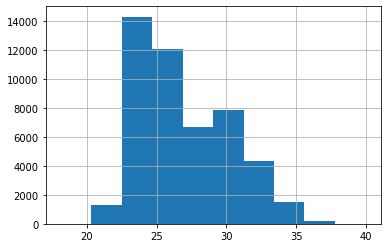

In [141]:
base['temp'].hist()

In [142]:
# Eliminar as pressões iguais a zero, consideradas outliers
inds =[x for x in base.index if (base.loc[x]['pressao']==0)]
base.drop(inds,axis=0,inplace=True)

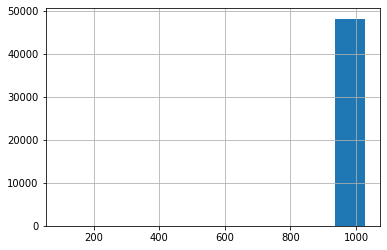

In [143]:
base['pressao'].hist()

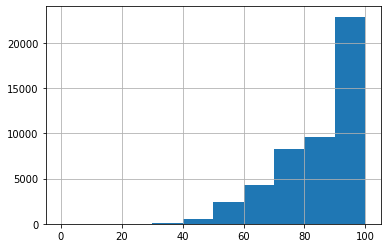

In [144]:
base['humidade'].hist()

In [145]:
# Eliminar as pressões iguais a zero, consideradas outliers
inds =[x for x in base.index if (base.loc[x]['humidade']==0)]
base.drop(inds,axis=0,inplace=True)

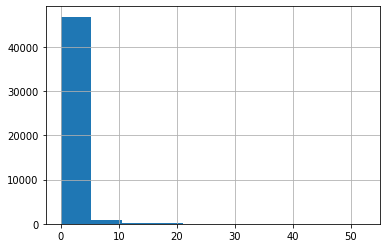

In [146]:
base['chuva/3h'].hist()

In [147]:
base[base['chuva/3h']>50]

,temp,pressao,humidade,veloc_vento,nuvens,clima,data,chuva/3h,hora
11216,22.452,1020,99,1,88,Rain,20140726,52.0,6
11219,22.509,1020,99,1,88,Rain,20140726,52.5,9
14565,25.776,1019,87,2,80,Rain,20150110,52.5,1


In [148]:
base.drop(['data','hora'],axis=1).describe()

,temp,pressao,humidade,veloc_vento,nuvens,chuva/3h
count,48205.000000,48205.000000,48205.000000,48205.000000,48205.000000,48205.000000
mean,26.962157,1014.387657,84.496484,1.404315,44.297811,0.457197
std,3.326409,7.240884,13.406934,0.933254,28.567007,1.964030
min,18.150000,100.000000,18.000000,0.000000,0.000000,0.000000
25%,24.295000,1011.000000,74.000000,1.000000,20.000000,0.000000
50%,26.150000,1015.000000,88.000000,1.000000,40.000000,0.000000
75%,29.150000,1018.000000,95.000000,2.000000,75.000000,0.000000
max,39.952000,1028.000000,100.000000,13.000000,100.000000,52.500000


### Média das medidas no dia

In [149]:
clima = base[['data','clima']]

In [150]:
base = base.groupby('data').mean()

In [151]:
base['data'] = base.index
base = base.reset_index(drop=True)

### Característia 'clima' tratada com OneHot

In [152]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 8 columns):
temp           2232 non-null float64
pressao        2232 non-null float64
humidade       2232 non-null float64
veloc_vento    2232 non-null float64
nuvens         2232 non-null float64
chuva/3h       2232 non-null float64
hora           2232 non-null float64
data           2232 non-null int64
dtypes: float64(7), int64(1)
memory usage: 139.6 KB


In [153]:
base.head()

,temp,pressao,humidade,veloc_vento,nuvens,chuva/3h,hora,data
0,35.200000,1013.000000,45.000000,1.000000,80.000000,0.0,14.000000,20121001
1,25.525000,1011.250000,86.750000,1.000000,48.125000,0.0,18.250000,20121002
2,28.836500,1011.850000,71.500000,0.950000,59.250000,0.0,11.300000,20121003
3,30.363478,1011.695652,69.782609,0.956522,44.782609,0.0,12.000000,20121004
4,30.034444,1011.277778,68.611111,1.666667,52.777778,0.0,11.611111,20121005


In [156]:
# método usado em variáveis qualitativas nominais, para não criar uma ordem substituindo por números apenas
OH_encoder = OneHotEncoder(sparse=False)
clima_OH = pd.DataFrame(OH_encoder.fit_transform(np.array(clima['clima']).reshape(-1, 1)))
clima_OH = pd.concat([clima['data'],clima_OH],axis=1)
# Coloco na base apenas a informação binária de haver ou não ocorrido o clima
clima_OH = clima_OH.groupby('data').max()
clima_OH = clima_OH.reset_index(drop=True)
base_OH = pd.concat([base,clima_OH],axis=1)

In [160]:
a = np.array(base_OH.columns)
a[8:]=OH_encoder.categories_[0]
base_OH.columns = a

In [161]:
base_OH.head()

,temp,pressao,humidade,veloc_vento,nuvens,chuva/3h,hora,data,Clear,Clouds,Drizzle,Fog,Mist,Rain,Smoke,Thunderstorm
0,35.200000,1013.000000,45.000000,1.000000,80.000000,0.0,14.000000,20121001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.525000,1011.250000,86.750000,1.000000,48.125000,0.0,18.250000,20121002,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.836500,1011.850000,71.500000,0.950000,59.250000,0.0,11.300000,20121003,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.363478,1011.695652,69.782609,0.956522,44.782609,0.0,12.000000,20121004,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.034444,1011.277778,68.611111,1.666667,52.777778,0.0,11.611111,20121005,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [162]:
base_OH.to_csv('base_metereologica_tratada_OneHot.csv')

### Característica 'clima' tratada com Labels

In [17]:
# substitui por números
base_LE = base.copy()
label_encoder = LabelEncoder()
base_LE['clima'] = LabelEncoder().fit_transform(base_LE['clima'])

In [18]:
base_LE.head()

,temp,pressao,humidade,veloc_vento,nuvens,clima,data,chuva/3h,hora
0,24.15,1014,0,7,80,5,20121001,0.0,12
1,35.20,1013,45,1,80,0,20121001,0.0,14
2,22.15,1015,100,2,75,1,20121002,0.0,14
3,23.15,1014,94,0,40,1,20121002,0.0,15
4,24.15,1014,94,2,40,1,20121002,0.0,16


In [41]:
base_LE.to_csv('base_metereologica_tratada_LabelEncoder.csv')